In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(digest)
options(repr.matrix.max.rows = 6)
#source("tests.R")
#source("cleanup.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [2]:
player_stats <- read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
player_stats

New names:
• `` -> `...1`
Rows: 500 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (25): Age, Country, Plays, Wikipedia, Current Rank, Best Rank, Name, Bac...
dbl (13): ...1, Turned Pro, Seasons, Titles, Best Season, Retired, Masters, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,⋯,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋱,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
498,24 (17-05-1995),Ukraine,NA,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
499,22 (26-03-1997),Tunisia,Left-handed,Wikipedia,451 (69),408 (24-12-2018),Aziz Dougaz,Two-handed,"$61,984",⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [3]:
# tidying data/renaming Turned Pro

players_tidy <- player_stats|>
    select(Age, "Best Rank", "Turned Pro", "Prize Money")|>
    separate(col = "Age",
             into = c("Age", "Birthday","Birth_month", "Birth_year"),
             convert = TRUE) |>
    separate(col = "Best Rank",
             into = c("best_rank", 
                   "Best_rank_day", "Best_rank_month", "Best_rank_year"),
            convert = TRUE) |>
    select(-Birth_month, -Birthday, -Best_rank_day, -Best_rank_month) |>
    separate(col = "Turned Pro",
             into = "turned_pro")|>
    mutate(turned_pro = as.numeric(turned_pro))|>
    mutate(pro_duration = Best_rank_year - turned_pro)|>
    mutate(turned_pro_age = turned_pro - Birth_year)|>
    rename("prize_money" = "Prize Money")|>
    separate(prize_money, c(NA, "millions", "thousands", "hundreds"))|>
    mutate(millions = as.numeric(millions))|>
    mutate(thousands = as.numeric(thousands))|>
    mutate(hundreds = as.numeric(hundreds))|>
    mutate(millions = millions * 1000000)|>
    mutate(thousands = thousands * 1000)|>
    mutate(prize_money = millions + thousands + hundreds)|>
    mutate(prize_money= prize_money/1000)|>
    select(prize_money, best_rank)|>
    na.omit()
players_tidy


Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 4 pieces. Additional pieces discarded in 499 rows [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, ...].”
Warning message:
“Expected 4 pieces. Additional pieces discarded in 21 rows [16, 96, 128, 142, 208, 212, 228, 267, 274, 337, 363, 364, 381, 394, 414, 423, 435, 436, 461, 468, ...].”
Warning message:
“Expected 4 pieces. Missing pieces filled with `NA` in 264 rows [2, 4, 7, 8, 9, 10, 13, 14, 15, 18, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, ...].”


prize_money,best_rank
<dbl>,<int>
3261.567,44
6091.971,17
1517.157,31
⋮,⋮
1703.096,58
1048.314,74
22132.368,4


In [4]:
# setting seed
set.seed(1552)

Warning message:
“Removed 4 rows containing missing values (geom_point).”


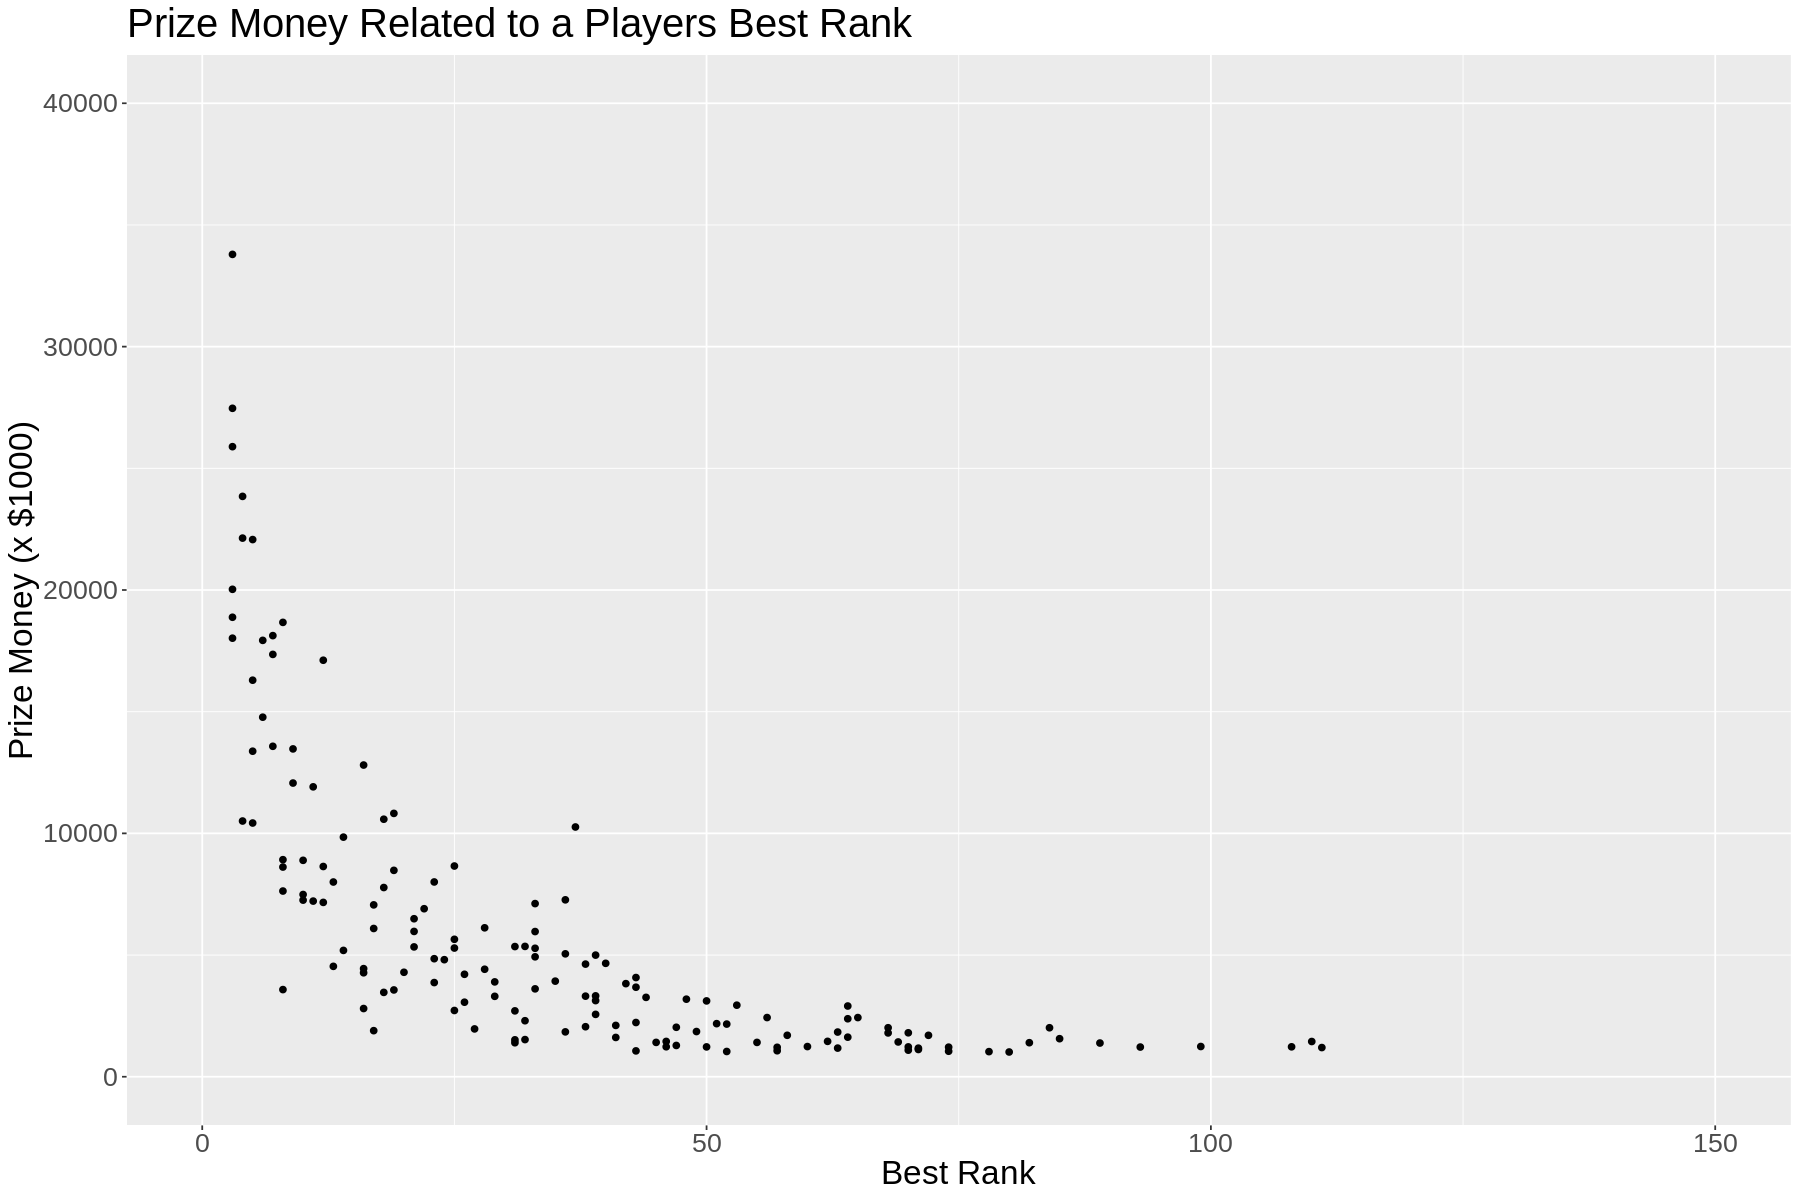

In [5]:
#scatterplot best rank vs. prize money

options(repr.plot.width = 15, repr.plot.height = 10)

players_plot<-players_tidy|>
    ggplot(aes(x = best_rank, y = prize_money))+
    geom_point()+
    labs(x = "Best Rank", y = "Prize Money (x $1000)")+
    ggtitle("Prize Money Related to a Players Best Rank")+
    ylim(0,40000)+
    xlim(0,150)+
    theme(text = element_text(size = 20))
players_plot

K-NN Regression Model:

In [6]:
#splitting data


players_split<-initial_split(players_tidy, prop = 0.75, strata = prize_money)
players_training<-training(players_split)
players_testing<-testing(players_split)
players_training
players_testing



prize_money,best_rank
<dbl>,<int>
1517.157,31
1285.541,47
1062.355,43
⋮,⋮
14773.644,6
8918.917,8
22132.368,4


prize_money,best_rank
<dbl>,<int>
3261.567,44
6091.971,17
1893.476,17
⋮,⋮
8480.383,19
18879.855,3
3304.117,29


In [7]:
#making recipe

players_spec<-nearest_neighbor(weight_func = "rectangular", neighbors = tune())|>
    set_engine("kknn")|>
    set_mode("regression")

players_recipe<-recipe(prize_money ~ best_rank, data = players_training)|>
    step_scale(all_predictors())|>
    step_center(all_predictors())

players_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

Operations:

Scaling for all_predictors()
Centering for all_predictors()

In [8]:
#making workflow

players_vfold<-vfold_cv(players_training, v = 5, strata = prize_money)

players_fit<-workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec)|>
    fit(players_training)
players_fit



Warning message:
“tune samples were requested but there were 115 rows in the data. 110 will be used.”


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(tune(),     data, 5), kernel = ~"rectangular")

Type of response variable: continuous
minimal mean absolute error: 9025.869
Minimal mean squared error: 443466446
Best kernel: rectangular
Best k: 110

In [9]:
#knn regression metrics

gridvals<-tibble(neighbors = seq(1, 50))

players_results<- players_fit|>
    tune_grid(resamples = players_vfold, grid = gridvals)|>
    collect_metrics()
players_results


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6409.9458990,5,1.971516e+03,Preprocessor1_Model01
1,rsq,standard,0.7759743,5,9.880043e-02,Preprocessor1_Model01
2,rmse,standard,6471.9870691,5,2.154208e+03,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,3.514544e-01,5,8.330297e-02,Preprocessor1_Model49
50,rmse,standard,1.715247e+04,5,5.236844e+03,Preprocessor1_Model50
50,rsq,standard,3.531760e-01,5,8.479045e-02,Preprocessor1_Model50


In [28]:
#arranging metrics 

players_min<-players_results|>
    filter(.metric == "rmse")|>
    arrange(mean)|>
    slice(1)
players_min


neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
3,rmse,standard,5773.366,5,1781.971,Preprocessor1_Model03


In [29]:
players_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,rmse,standard,6409.9458990,5,1.971516e+03,Preprocessor1_Model01
1,rsq,standard,0.7759743,5,9.880043e-02,Preprocessor1_Model01
2,rmse,standard,6471.9870691,5,2.154208e+03,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,rsq,standard,3.514544e-01,5,8.330297e-02,Preprocessor1_Model49
50,rmse,standard,1.715247e+04,5,5.236844e+03,Preprocessor1_Model50
50,rsq,standard,3.531760e-01,5,8.479045e-02,Preprocessor1_Model50


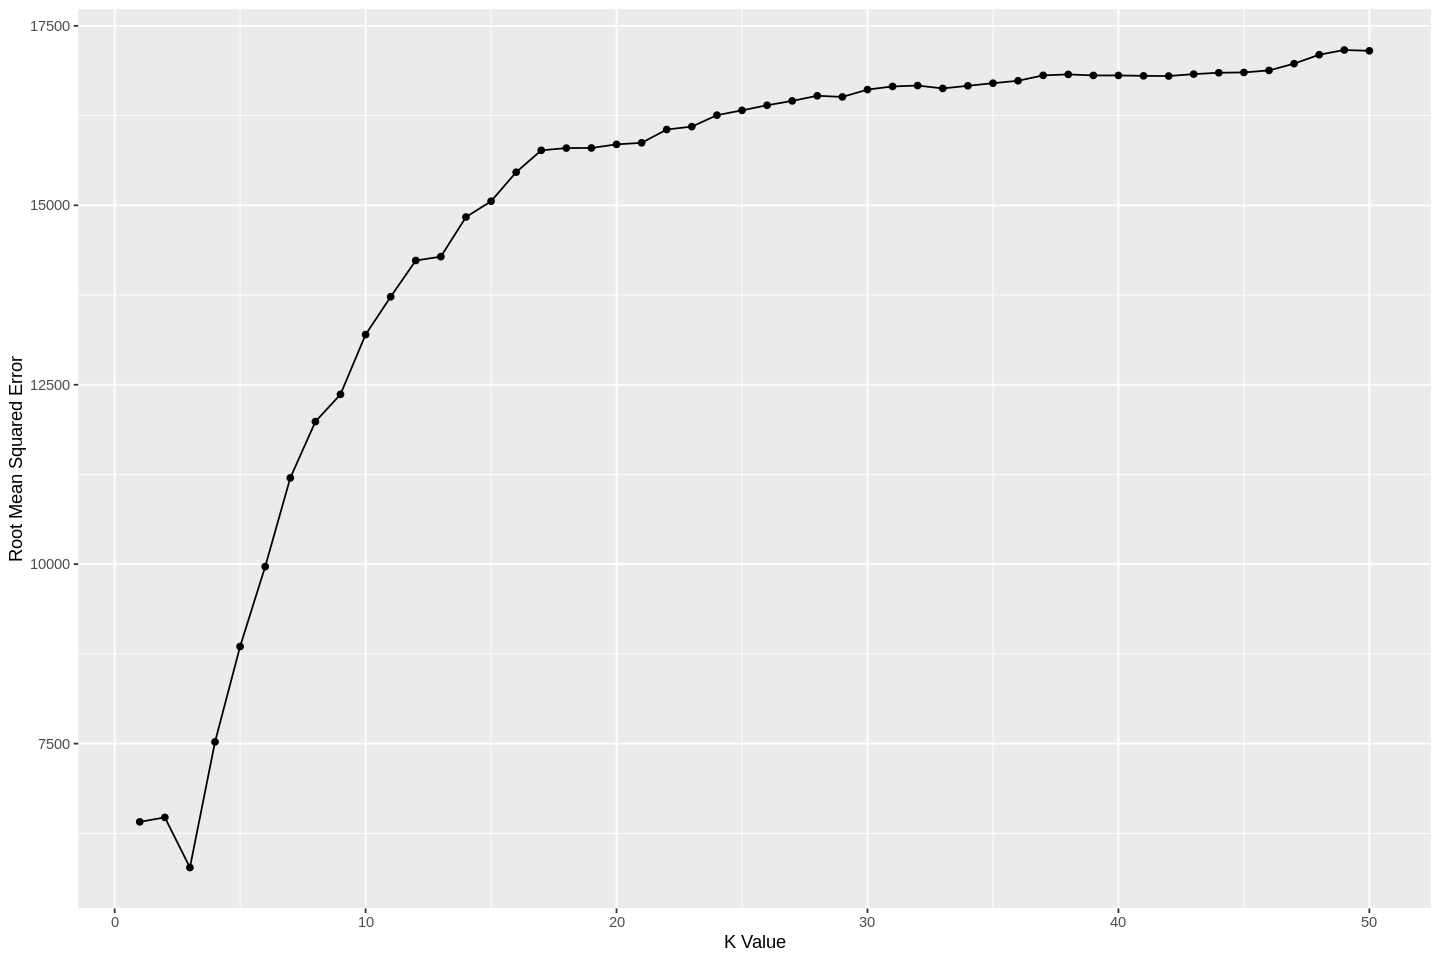

In [30]:
#plot to find best k value 

best_k_plot<-players_results|>
    filter(.metric == "rmse")|>
    ggplot(aes(x = neighbors, y = mean))+
    geom_point()+
    geom_line()+
    labs(x = "K Value", y = "Root Mean Squared Error")
best_k_plot

In [31]:
# best k (lowest rmse value)
best_k<-players_min|>
    pull(1)
best_k


[1] 3

In [32]:
# calculating rmse for training set

rmse_training<-players_fit|>
    predict(players_training)|>
    bind_cols(players_training)|>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()

rmse_training

[1] 20833.34

In [33]:
# retraining model on training set with best k,
# and making predictions on testing data

players_spec_best<-nearest_neighbor(weight_func = "rectangular", neighbors = best_k)|>
    set_engine("kknn")|>
    set_mode("regression")

players_fit_best<-workflow()|>
    add_recipe(players_recipe)|>
    add_model(players_spec_best)|>
    fit(data = players_training)

players_summary<-players_fit_best|>
    predict(players_testing)|>
    bind_cols(players_testing)|>
    metrics(truth = prize_money, estimate = .pred)

players_summary


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,3330.4563743
rsq,standard,0.7267618
mae,standard,2269.9885667


In [34]:
# summarizing knn predictions

players_knn_preds<-players_fit_best|>
    predict(players_training)|>
    bind_cols(players_training)
players_knn_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
3191.001,1517.157,31
2168.270,1285.541,47
2323.144,1062.355,43
⋮,⋮,⋮
12858.49,14773.644,6
12068.28,8918.917,8
18828.90,22132.368,4


In [35]:
# rmspe for testing set 

rmspe_testing<-players_summary|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
rmspe_testing

[1] 3330.456

Linear Regression Model:

In [36]:
players_tidy

prize_money,best_rank
<dbl>,<int>
3261.567,44
6091.971,17
1517.157,31
⋮,⋮
1703.096,58
1048.314,74
22132.368,4


In [19]:
# splitting data for linear regression

players_split_lm<-initial_split(players_tidy, prop = 0.75, strata = prize_money)
players_training_lm<-training(players_split_lm)
players_testing_lm<-testing(players_split_lm)

players_training_lm
players_testing_lm

prize_money,best_rank
<dbl>,<int>
1517.157,31
1285.541,47
1062.355,43
⋮,⋮
14773.64,6
18879.85,3
22132.37,4


prize_money,best_rank
<dbl>,<int>
1893.476,17
10507.693,4
25889.586,3
⋮,⋮
8918.917,8
2013.015,84
1048.314,74


In [20]:
# creating recipe and prepping model

players_lm_spec<- linear_reg()|>
    set_engine("lm")|>
    set_mode("regression")

players_lm_recipe<-recipe(prize_money ~ best_rank, data = players_training_lm)

players_lm_recipe


Recipe

Inputs:

      role #variables
   outcome          1
 predictor          1

In [21]:
# making lm workflow

players_lm_fit<-workflow()|>
    add_recipe(players_lm_recipe)|>
    add_model(players_lm_spec)|>
    fit(data = players_training_lm)
players_lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)    best_rank  
      18659         -280  


In [22]:
# summarizing lm predictions

players_lm_preds<- players_lm_fit|>
    predict(players_training_lm)|>
    bind_cols(players_training_lm)

players_lm_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
9978.776,1517.157,31
5498.447,1285.541,47
6618.529,1062.355,43
⋮,⋮,⋮
16979.29,14773.64,6
17819.35,18879.85,3
17539.33,22132.37,4


In [23]:
# calculating training rmse

players_lm_rmse<-players_lm_fit|>
    predict(players_training_lm)|>
    bind_cols(players_training_lm)|>
    metrics(truth = prize_money, estimate = .pred)|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
players_lm_rmse

[1] 16415.39

In [24]:
# summarizing testing predictions 

players_lm_summary<-players_lm_fit|>
    predict(players_testing_lm)|>
    bind_cols(players_testing_lm)|>
    metrics(truth = prize_money, estimate = .pred)
players_lm_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,18369.562324
rsq,standard,0.167294
mae,standard,7303.573966


In [25]:
# calculating testing rmspe 

players_lm_rmspe<-players_lm_summary|>
    filter(.metric == "rmse")|>
    select(.estimate)|>
    pull()
players_lm_rmspe

[1] 18369.56

Linear Regression RMSPE is 7268.89, K-NN Rgegression RMSPE is 3858.99. Therefore, for this data, the KNN model works better (results in a smaller error).

In [26]:
players_knn_preds
players_lm_preds

.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
3191.001,1517.157,31
2168.270,1285.541,47
2323.144,1062.355,43
⋮,⋮,⋮
12858.49,14773.644,6
12068.28,8918.917,8
18828.90,22132.368,4


.pred,prize_money,best_rank
<dbl>,<dbl>,<int>
9978.776,1517.157,31
5498.447,1285.541,47
6618.529,1062.355,43
⋮,⋮,⋮
16979.29,14773.64,6
17819.35,18879.85,3
17539.33,22132.37,4


Warning message:
“Removed 5 rows containing missing values (geom_point).”
Warning message:
“Removed 4 row(s) containing missing values (geom_path).”
Warning message:
“Removed 16 row(s) containing missing values (geom_path).”


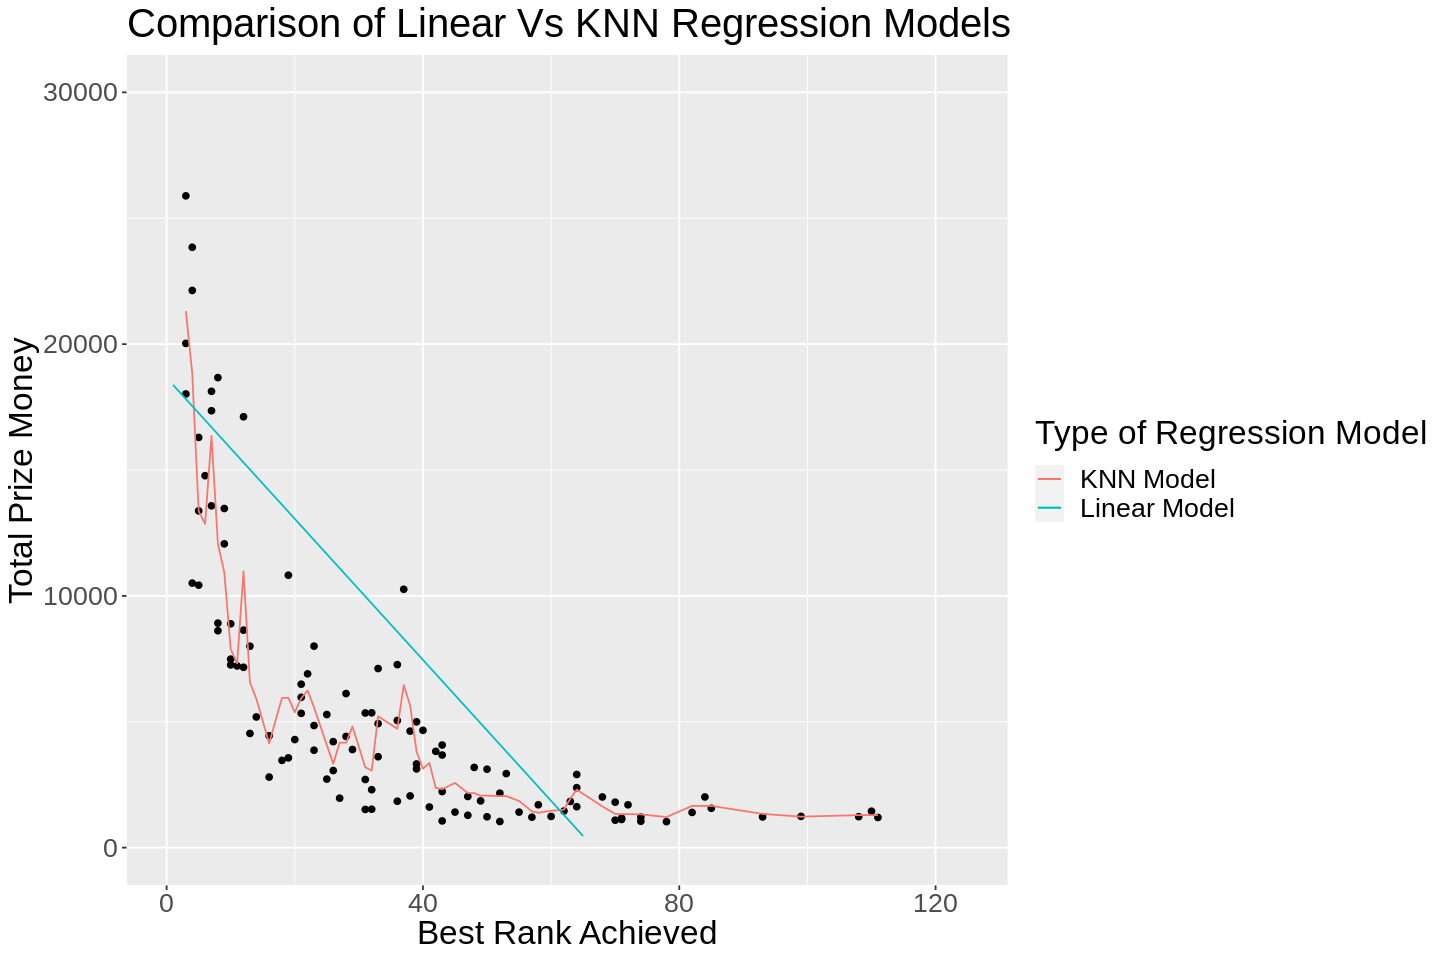

In [27]:
# overlaying plots of KNN and linear regression predictions onto true training sets.
options(repr.plot.width = 12, repr.plot.height = 8)

knn_vs_linear_plot<-ggplot(data = players_knn_preds, aes(x = best_rank, y = prize_money))+
    geom_point()+
    labs(x = "Best Rank Achieved", y = "Total Prize Money")+
    ylim(0,30000)+
    xlim(0,125)+
    geom_line(data = players_knn_preds, aes(x = best_rank, y = .pred, colour = "KNN Model"))+
    geom_line(data = players_lm_preds, aes(x = best_rank, y = .pred, colour = "Linear Model"))+
    labs(colour = "Type of Regression Model")+
    ggtitle("Comparison of Linear Vs KNN Regression Models")+
    theme(text = element_text(size = 20))
knn_vs_linear_plot

